In [6]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

In [7]:
from langgraph.graph import StateGraph
from node import *
from configs import set_env


set_env()

workflow = StateGraph(OverallState)
workflow.add_node("mail", mail_node)
workflow.add_node("supervisor", supervisor_node)
workflow.add_node("info", info_node)
workflow.add_node("message", message_node)
workflow.add_node("mail_tool", mail_tool_node)
workflow.add_edge("__start__", "supervisor")
workflow.add_conditional_edges("supervisor", supervisor_choice)
workflow.add_conditional_edges("mail", choose_tools_or_messages)
workflow.add_edge("info", "message")
workflow.add_edge("mail_tool", "message")
workflow.add_edge("message", "__end__")
com_agent = workflow.compile()

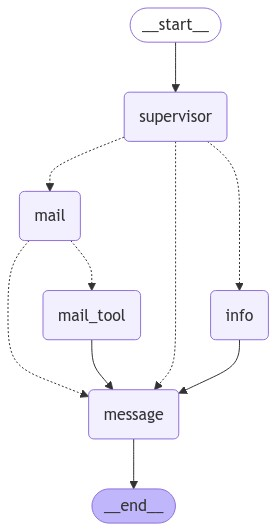

In [8]:
display(
        Image(
            com_agent.get_graph().draw_mermaid_png(
                draw_method=MermaidDrawMethod.API,
            )
        )
    )

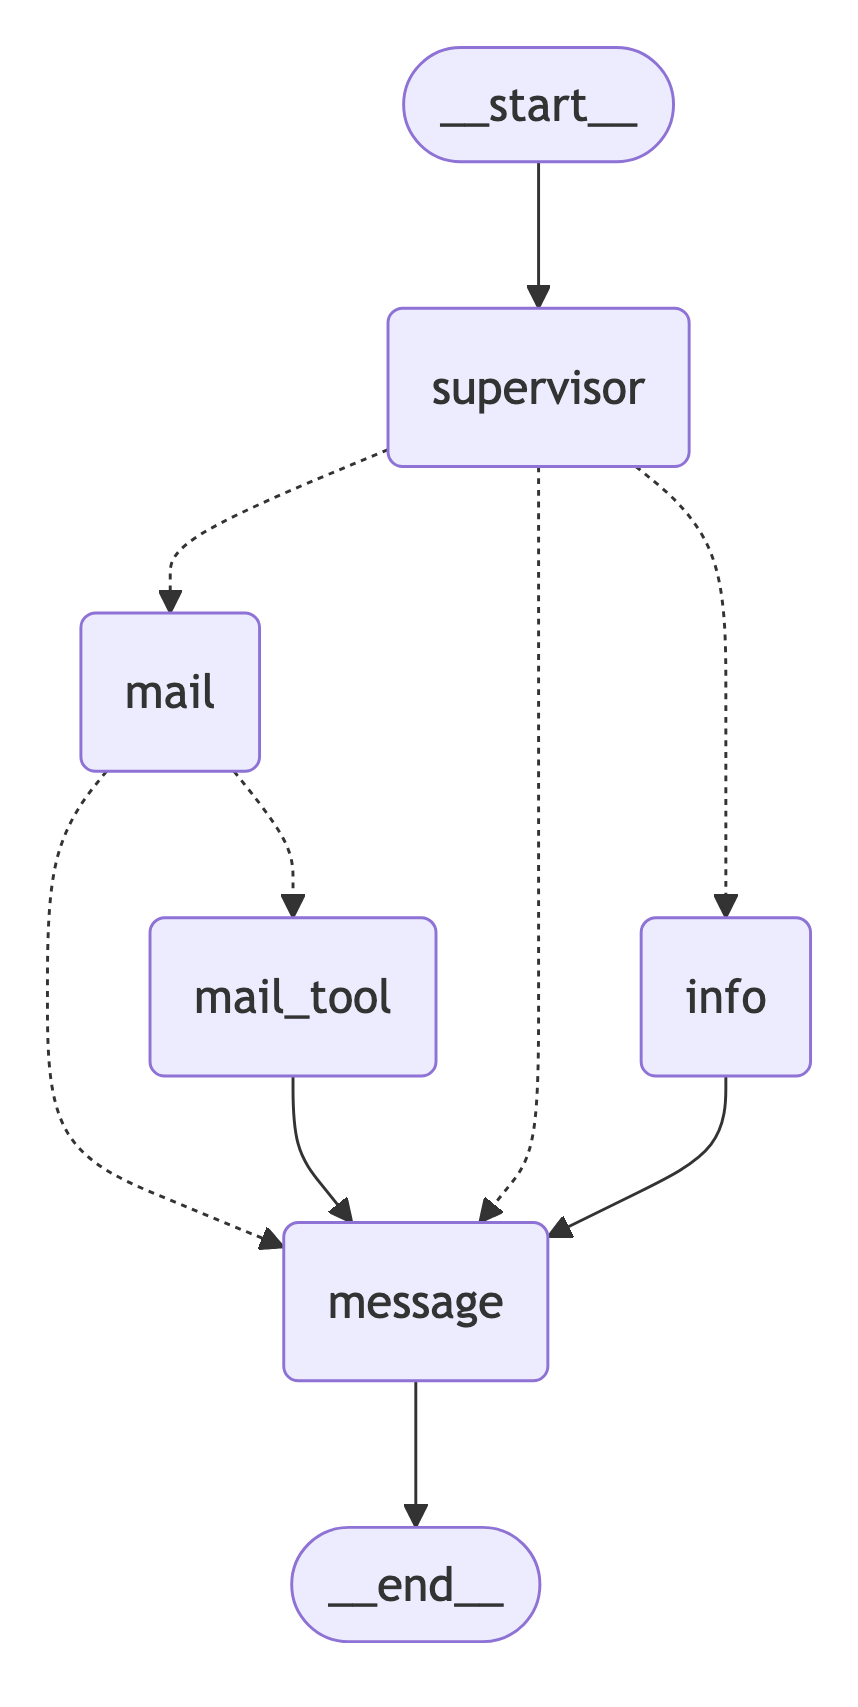

In [9]:
import nest_asyncio

nest_asyncio.apply()  # Required for Jupyter Notebook to run async functions

display(
    Image(
        com_agent.get_graph().draw_mermaid_png(
            curve_style=CurveStyle.LINEAR,
            node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#fad7de"),
            wrap_label_n_words=9,
            output_file_path=None,
            draw_method=MermaidDrawMethod.PYPPETEER,
            background_color="white",
            padding=10,
        )

    )
)